In [94]:
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [95]:
# x = np.array([1, 2, 3, 4, 5, 6])
# y = np.array([5, 4, 6, 5, 6, 7])

def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)


# Regression math:

For regression, we generally draw the best fit line in a given dataset. The best fit line equation is given by:<br><br>
$\Large y  = m \cdot x + b$ <br><br>
where, m = slope of the line and, b = y-intercept<br>
slope is given by,<br><br>
$\Large m = \frac{\bar{x} \cdot \bar{y} - \bar{x \cdot y}}{\bar{x}^2 - \bar{x^2}}$<br><br>
and, y-intercept is give by,<br><br>
$\Large b = \bar{y} - m \cdot \bar{x}$

In [96]:
def best_fit_slope_yint(xs, ys):
    m = (mean(xs)*mean(ys) - mean(xs*ys))/(mean(xs)**2 - mean(xs**2))
    b = mean(ys) - m*mean(xs)
    
    return m, b

### R-Squared Theory

This is used to determine the accuracy of the best fit line.<br><br>
$\Large R^2 = 1 - \frac{\text{Squared Error of  } \hat{y}}{\text{Squared Error of  } \bar{y}}$<br><br>
where, $\hat{y}$ is best-fit line or Regression line and, $\bar{y}$ is mean of all y.

In [97]:
def squared_error(ys_orig, ys_line):
    
    return sum((ys_line - ys_orig)**2)

In [98]:
def coefficient_of_determination(ys_orig, ys_line):
    ys_mean_line = [np.mean(ys_orig) for y in ys_orig]
    square_error_regressor = squared_error(ys_orig, ys_line)
    square_error_mean = squared_error(ys_orig, ys_mean_line)
    return (1 - square_error_regressor/square_error_mean)
    

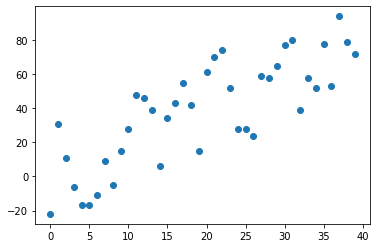

In [99]:
xs, ys = create_dataset(40, 30, 2, correlation='pos')

plt.scatter(xs, ys)
plt.show()

In [100]:
m, b = best_fit_slope_yint(xs, ys)

regression_line = [((m*x) + b) for x in xs]

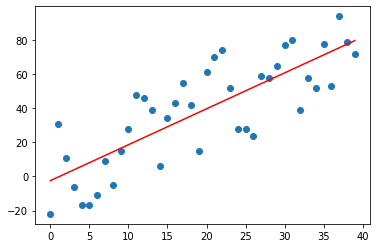

In [101]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line, color='red')
plt.show()

In [102]:
predict_x = 8
predict_y = m*predict_x + b

print(predict_y)

14.396247654784244


In [103]:
r_squared = coefficient_of_determination(ys, regression_line)

print(r_squared)

0.6424954245257444


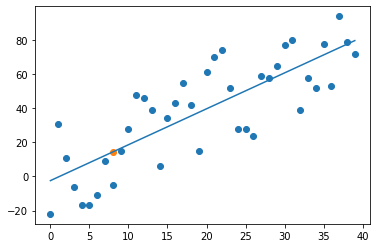

In [104]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y)
plt.plot(xs, regression_line)
plt.show()